In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [101]:
def latlon2point(lat, lon, zoom):
    R = 6378137
    MAX_LAT = 85.0511287798

    d = math.pi / 180
    lat = max(min(MAX_LAT, lat), -MAX_LAT)
    sin = math.sin(lat * d)
    
    x = R * lon * d
    y = R * math.log((1 + sin) / (1 - sin)) / 2
    
    scale = 1 / (2 * math.pi * R)
    amap = 256 * math.pow(2, zoom)
    
    X = amap * (scale * x + 0.5)
    Y = amap * (0.5 - scale * y)
    
    return X, Y

In [102]:
latlon2point(20,135,10)

(229376.0, 116203.34943899626)

In [103]:
def latlon2point_e(lat, lon, zoom, ez):
    lat1 = 48
    lat2 = 20
    lon1 = 118
    lon2 = 150
    nx = 2560 / 8
    ny = 3360 / 8
    
    tilelat = (lat1 - lat2) / math.pow(2, ez)
    tilelon = (lon2 - lon1) / math.pow(2, ez)
    
    tx = math.floor((lon - lon1) / tilelon)
    ty = math.floor((lat1 - lat) / tilelat)
        
    tlon = lon1 + tilelon * tx
    tlat = lat1 - tilelat * ty
    
    sx, sy = latlon2point(tlat, tlon, zoom) 
    
    tlon2 = lon1 + tilelon * (tx + 1)
    tlat2 = lat1 - tilelat * (ty + 1)
    
    sx2, sy2 = latlon2point(tlat2, tlon2, zoom) 
    
    x =  sx + (sx2 - sx) * (lon - tlon) / tilelon
    y =  sy - (sy - sy2) * (tlat - lat) / tilelat
    
    #print (sy2 - sy) / ny
    
    return x, y

In [104]:
latlon2point_e(20, 135, 10, 3)

(229376.0, 116203.34943899626)

In [105]:
def error_y(lat, zoom):
    sx, sy = latlon2point(lat, 135, zoom)
    ex, ey = latlon2point_e(lat, 135, zoom, 3)
    
    return  sy - ey

In [106]:
error_y(35, 9)

6.964139870469808

0.91972960465
1.8394592093
3.6789184186
7.3578368372
14.7156736744
29.4313473488
58.8626946976
117.725389395
235.450778791
470.901557581


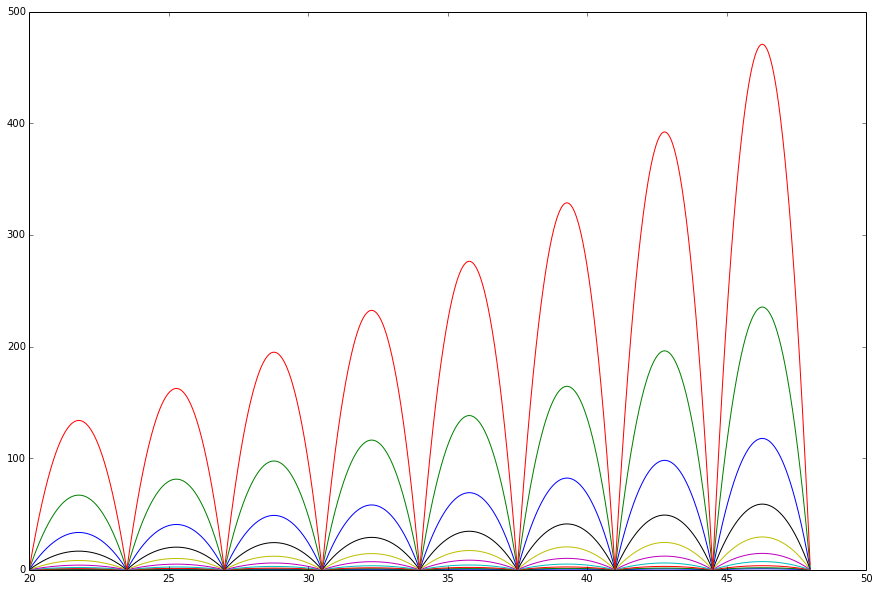

In [112]:
y = np.arange(20., 48., 28./3360)

plt.figure(figsize=(15,10))

for z in range(5,15):
    E = [error_y(lat, z) for lat in y]
    print max(E)
    plt.plot(y, E)
    
plt.ylim(0, 500)
plt.show()

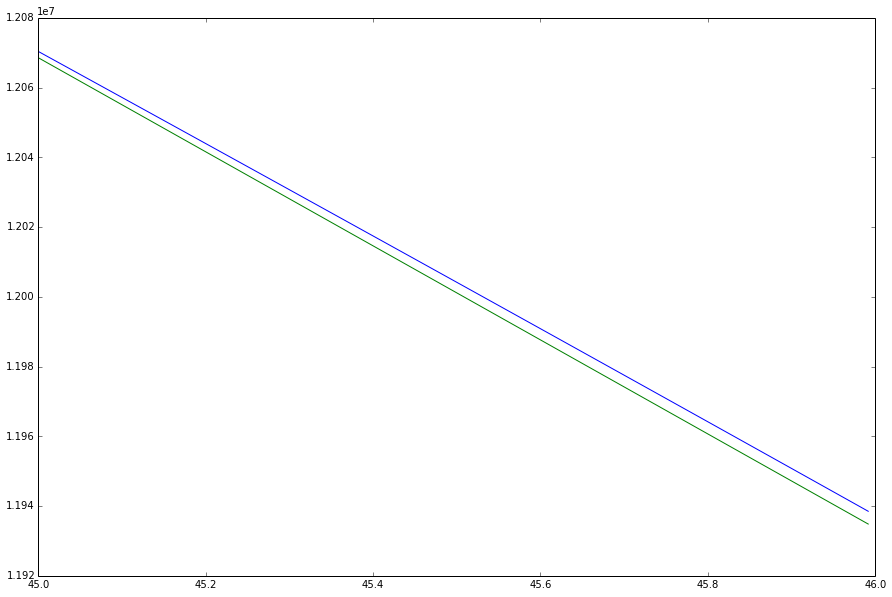

In [108]:
def sy(lat):
    x, y = latlon2point(lat, 135, 17)
    return y

def ey(lat):
    x, y = latlon2point_e(lat, 135, 17, 3)
    return y

y = np.arange(45, 46., 28./3360)

SY = [sy(lat) for lat in y]
EY = [ey(lat) for lat in y]

plt.figure(figsize=(15,10))
plt.plot(y, SY)
plt.plot(y, EY)
plt.show()